# HDB Resale Price Prediction

## Exploratory Data Analysis

### Import Libraries

In [28]:
# General
import math
import re
import numpy as np
import pandas as pd
from datetime import datetime
from tabulate import tabulate

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
colour_palette = sns.color_palette("hls", 8)
import geopandas as gpd
from scipy.stats import kurtosis, skew

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
# Importing Data
data_hdb_raw = pd.read_csv('../dataset/hdb_latest_raw.csv')
data_hdb_raw

,Unnamed: 0,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,block,remaining_lease,address,full_address,lat,long,nearest_mrt,nearest_distance_to_mrt
0,0,ANG MO KIO,3 ROOM,Improved,69.0,ANG MO KIO AVE 4,147000.0,2000-01,1986,07 TO 09,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
1,1,ANG MO KIO,3 ROOM,Improved,60.0,ANG MO KIO AVE 4,130000.0,2000-02,1986,07 TO 09,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
2,2,ANG MO KIO,2 ROOM,Improved,45.0,ANG MO KIO AVE 4,105000.0,2000-03,1986,04 TO 06,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
3,3,ANG MO KIO,2 ROOM,Improved,45.0,ANG MO KIO AVE 4,125000.0,2000-05,1986,04 TO 06,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
4,4,ANG MO KIO,2 ROOM,Improved,45.0,ANG MO KIO AVE 4,117000.0,2000-06,1986,07 TO 09,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881919,279698,WOODLANDS,5 ROOM,IMPROVED,126.0,WOODLANDS ST 83,316000.0,1999-12,1996,10 TO 12,863,96,863 WOODLANDS ST 83,863 WOODLANDS STREET 83 MY WORLD PRESCHOOL LTD...,1.440397,103.795020,admiralty,0.664
881920,279699,WOODLANDS,5 ROOM,IMPROVED,129.0,WOODLANDS ST 83,318000.0,1999-12,1996,04 TO 06,863,96,863 WOODLANDS ST 83,863 WOODLANDS STREET 83 MY WORLD PRESCHOOL LTD...,1.440397,103.795020,admiralty,0.664
881921,279700,WOODLANDS,5 ROOM,IMPROVED,124.0,WOODLANDS ST 83,311000.0,1999-12,1996,04 TO 06,863,96,863 WOODLANDS ST 83,863 WOODLANDS STREET 83 MY WORLD PRESCHOOL LTD...,1.440397,103.795020,admiralty,0.664
881922,279701,WOODLANDS,5 ROOM,IMPROVED,127.0,WOODLANDS ST 83,355000.0,1999-12,1996,01 TO 03,864,96,864 WOODLANDS ST 83,864 WOODLANDS STREET 83 SINGAPORE 730864,1.440847,103.794991,admiralty,0.668


### Descriptive Statistics

In [3]:
# Understanding Data I
data_hdb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881924 entries, 0 to 881923
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               881924 non-null  int64  
 1   town                     881924 non-null  object 
 2   flat_type                881924 non-null  object 
 3   flat_model               881924 non-null  object 
 4   floor_area_sqm           881924 non-null  float64
 5   street_name              881924 non-null  object 
 6   resale_price             881924 non-null  float64
 7   month                    881924 non-null  object 
 8   lease_commence_date      881924 non-null  int64  
 9   storey_range             881924 non-null  object 
 10  block                    881924 non-null  object 
 11  remaining_lease          881924 non-null  object 
 12  address                  881924 non-null  object 
 13  full_address             881924 non-null  object 
 14  lat 

In [4]:
# Understanding Data II
data_hdb_raw.describe()

,Unnamed: 0,floor_area_sqm,resale_price,lease_commence_date,lat,long,nearest_distance_to_mrt
count,881924.000000,881924.000000,8.819240e+05,881924.000000,881924.000000,881924.000000,881924.000000
mean,249966.561249,96.087785,3.128016e+05,1988.038816,1.361985,103.839698,0.803157
std,168335.361655,25.760922,1.613617e+05,10.213951,0.041527,0.073778,0.690815
min,0.000000,31.000000,5.000000e+03,1966.000000,1.270380,103.644248,0.023000
25%,110240.000000,73.000000,1.920000e+05,1981.000000,1.334192,103.773370,0.408000
50%,220480.500000,93.000000,2.900000e+05,1986.000000,1.355105,103.843569,0.651000
75%,381739.250000,114.000000,4.050000e+05,1996.000000,1.382273,103.898596,0.967000
max,602220.000000,307.000000,1.418000e+06,2019.000000,1.457071,103.987463,5.512000


### Data Visualisation

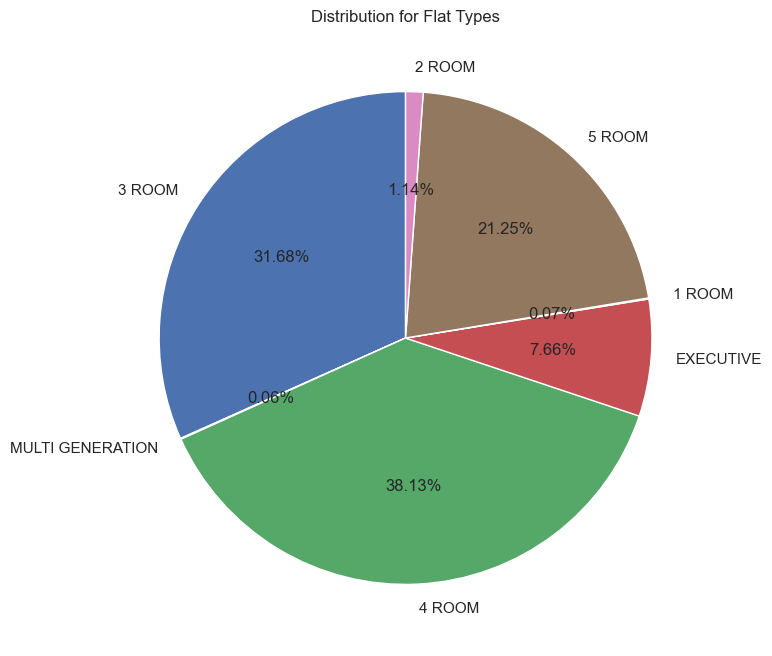

In [5]:
# Bar Plots, Charts etc.

# pie chart for flat_type

# count the occurrences of each flat_type
flat_type_counts = data_hdb_raw['flat_type'].value_counts()

# merge flat types with different names that refer to the same type
data_hdb_raw['flat_type'] = data_hdb_raw['flat_type'].str.replace('MULTI-GENERATION','MULTI GENERATION')

# arrange order of flat types as text labels will overlap
custom_order = ['3 ROOM', 'MULTI GENERATION','4 ROOM','EXECUTIVE','1 ROOM', '5 ROOM','2 ROOM'] 
flat_type_counts = data_hdb_raw['flat_type'].value_counts().loc[custom_order]

# size
plt.figure(figsize=(12, 8))

# plot
plt.pie(flat_type_counts, labels=flat_type_counts.index, autopct='%1.2f%%', startangle=90)
plt.title('Distribution for Flat Types')
plt.show()

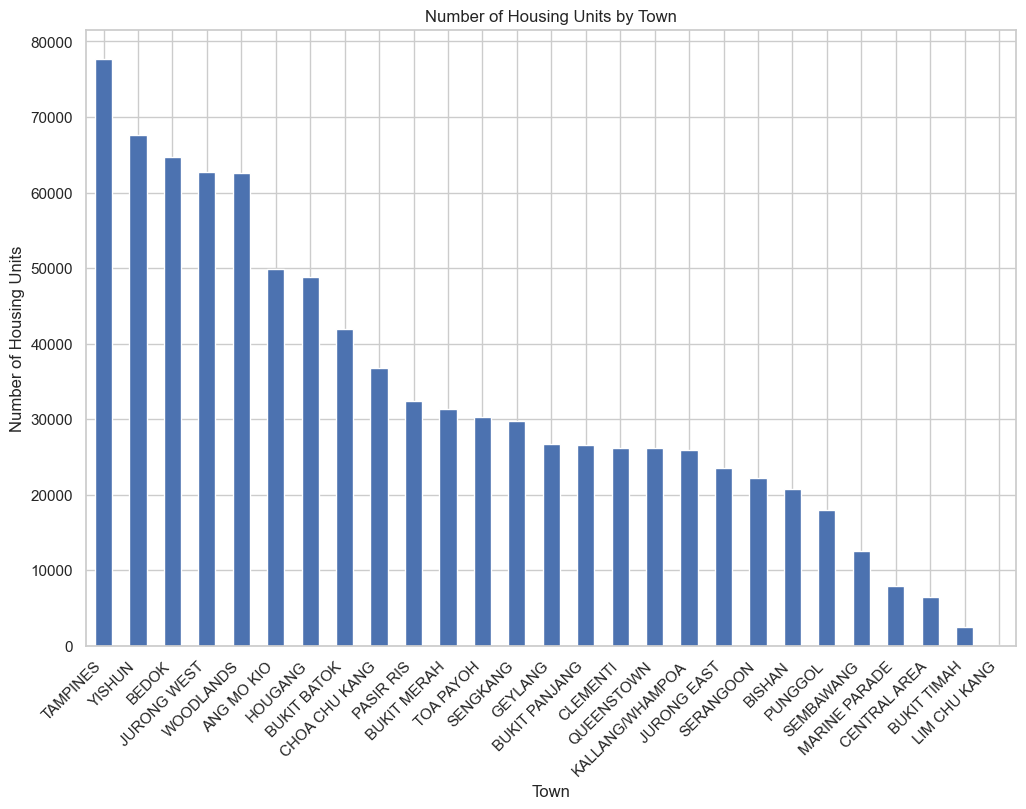

In [6]:
# bar chart for town

# count the occurrences of each town
town_counts = data_hdb_raw['town'].value_counts()

# size
plt.figure(figsize=(12, 8))

# plot
town_counts.plot(kind='bar')
plt.title('Number of Housing Units by Town')
plt.xlabel('Town')
plt.ylabel('Number of Housing Units')
plt.xticks(rotation=45, ha='right')
plt.show()

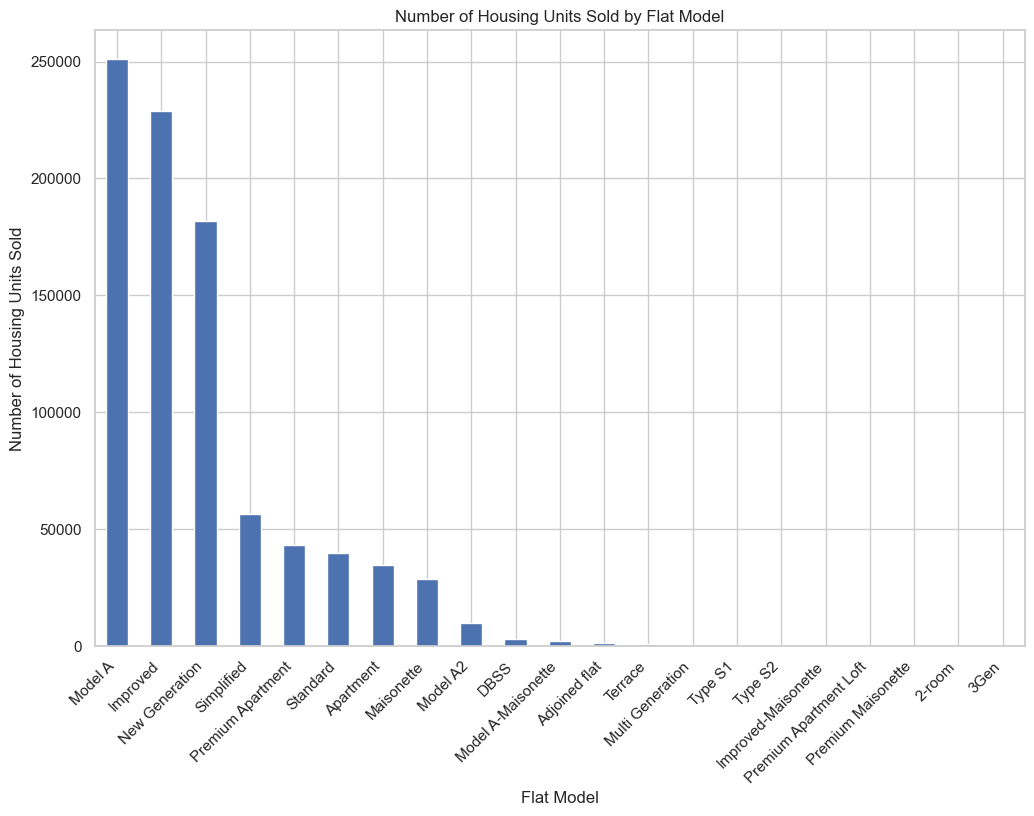

In [7]:
# bar chart for flat model

# merge flat model with different names that refer to the same type
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('MODEL A','Model A')
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('IMPROVED','Improved')
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('NEW GENERATION','New Generation')
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('PREMIUM APARTMENT', 'Premium Apartment')
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('SIMPLIFIED','Simplified')
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('APARTMENT','Apartment')
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('STANDARD','Standard')
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('MAISONETTE','Maisonette')
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('2-ROOM', '2-room')
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('IMPROVED-MAISONETTE', 'Improved-Maisonette')
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('MODEL A-MAISONETTE', 'Model A-Maisonette')
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('MULTI GENERATION', 'Multi Generation')
data_hdb_raw['flat_model'] = data_hdb_raw['flat_model'].str.replace('TERRACE','Terrace')

# count the occurrences of each flat_model
flat_model_counts = data_hdb_raw['flat_model'].value_counts()

# size
plt.figure(figsize=(12, 8))

# sort
flat_model_counts = flat_model_counts.sort_values(ascending=False)

# plot
flat_model_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

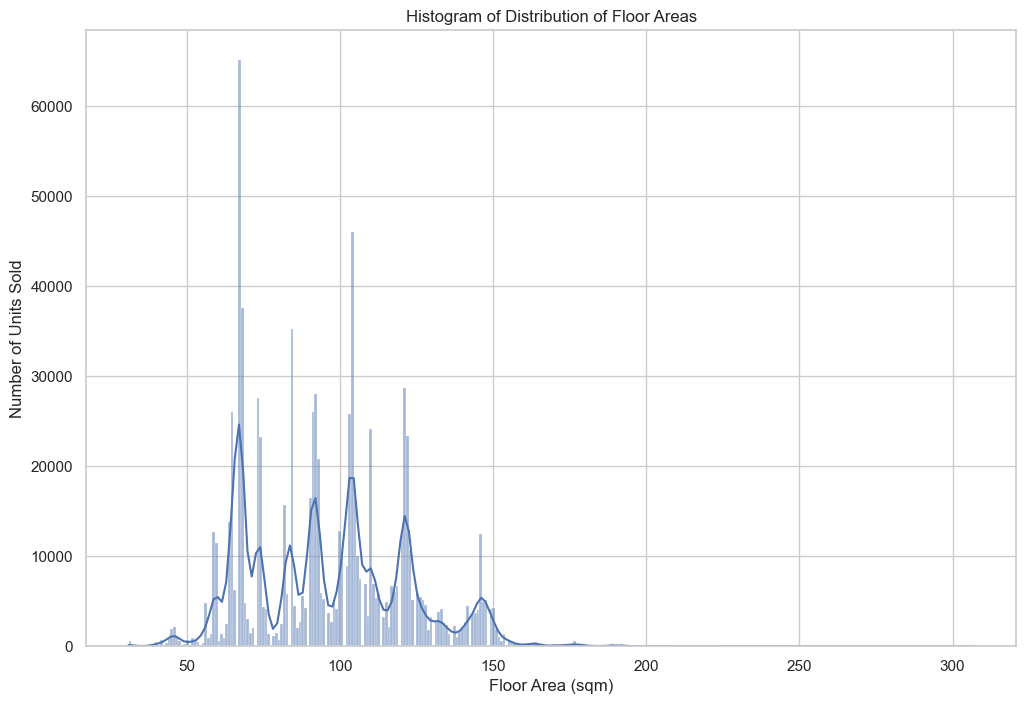

In [8]:
# histogram for floor area

# size
plt.figure(figsize=(12, 8))

# plot
sns.histplot(data_hdb_raw['floor_area_sqm'], kde=True)
plt.title('Histogram of Distribution of Floor Areas')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Number of Units Sold')
plt.show()

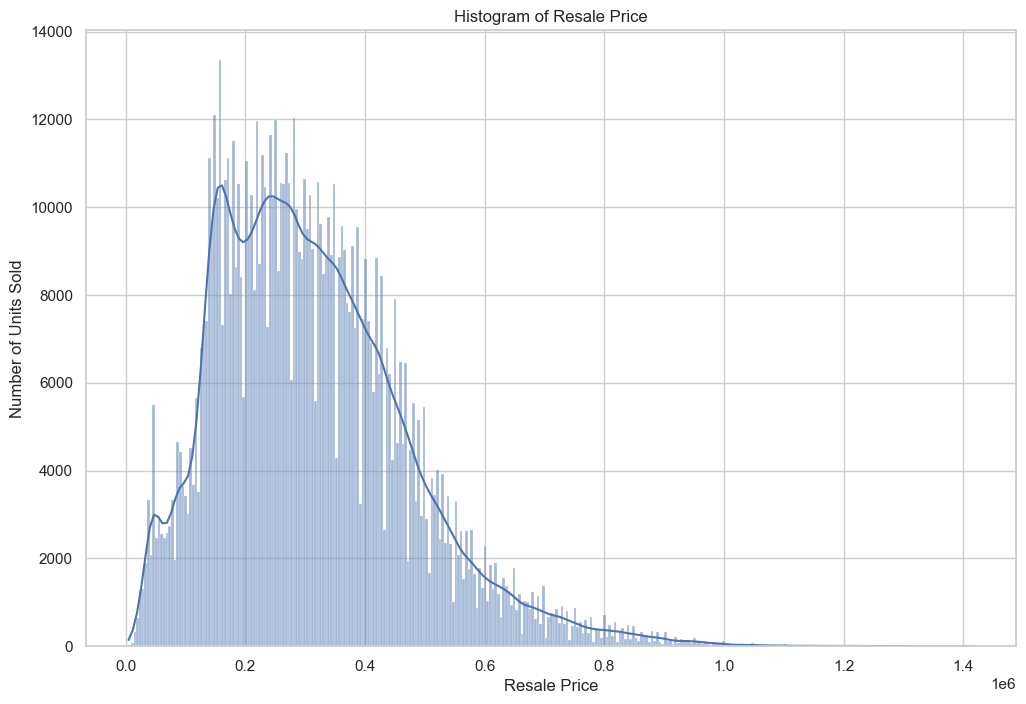

In [9]:
# histogram for resale_price

# size
plt.figure(figsize=(12, 8))

# plot
sns.histplot(data_hdb_raw['resale_price'], kde=True)
plt.title('Histogram of Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Number of Units Sold')
plt.show()

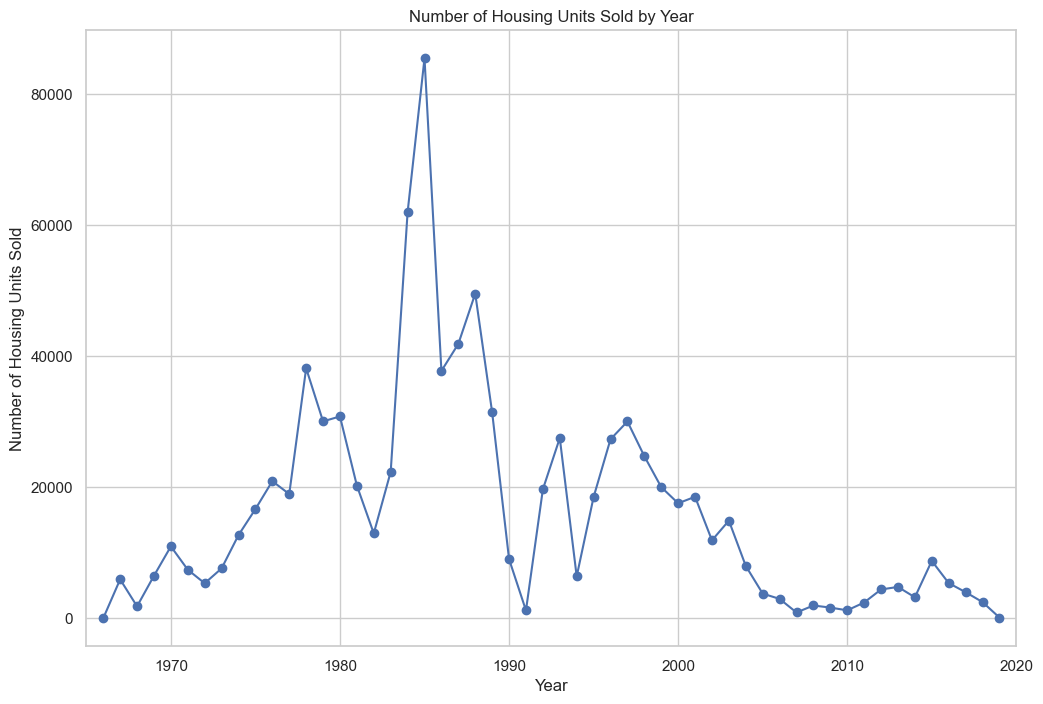

In [10]:
# time series chart for lease_commence_date

data_hdb_raw['lease_commence_date'] = pd.to_datetime(data_hdb_raw['lease_commence_date'], format='%Y')

# count the occurrences of each lease_commence_date (year)
year_counts = data_hdb_raw['lease_commence_date'].value_counts().sort_index()

# size
plt.figure(figsize=(12, 8))

# plot
year_counts.plot(kind='line', marker='o')
plt.title('Number of Housing Units Sold by Year')
plt.xlabel('Year')
plt.ylabel('Number of Housing Units Sold')
plt.xlim('1965', '2020')
plt.show()

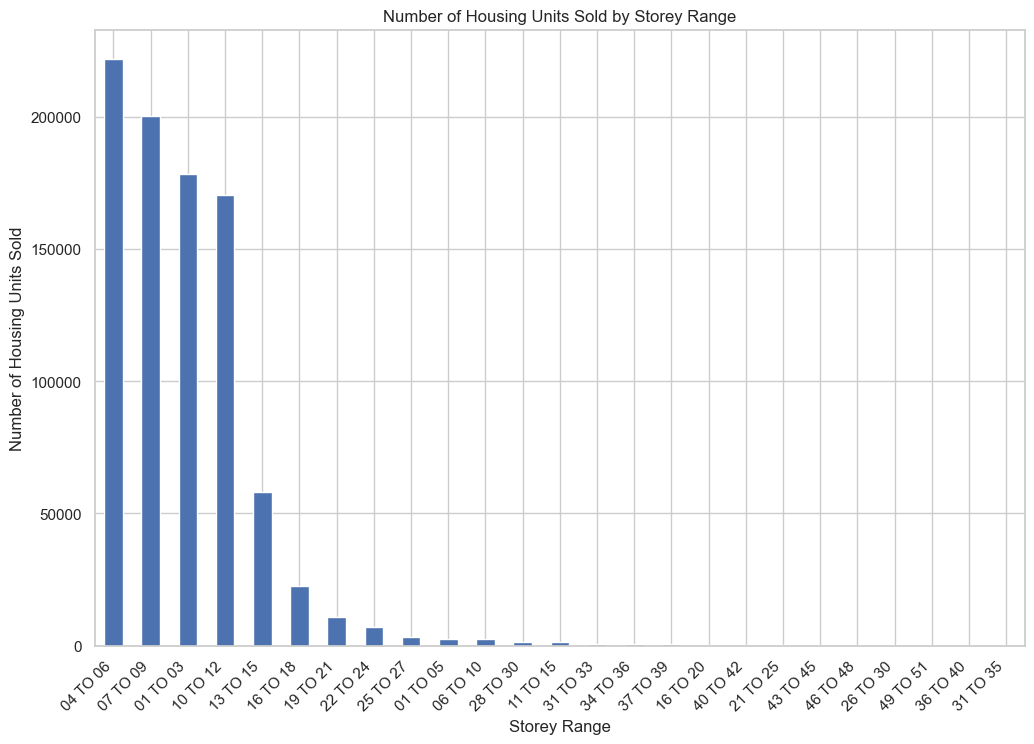

In [11]:
# bar chart for storey_range

# count the occurrences of each storey_range
story_counts = data_hdb_raw['storey_range'].value_counts()

# size
plt.figure(figsize=(12, 8))

# plot
story_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Storey Range')
plt.xlabel('Storey Range')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

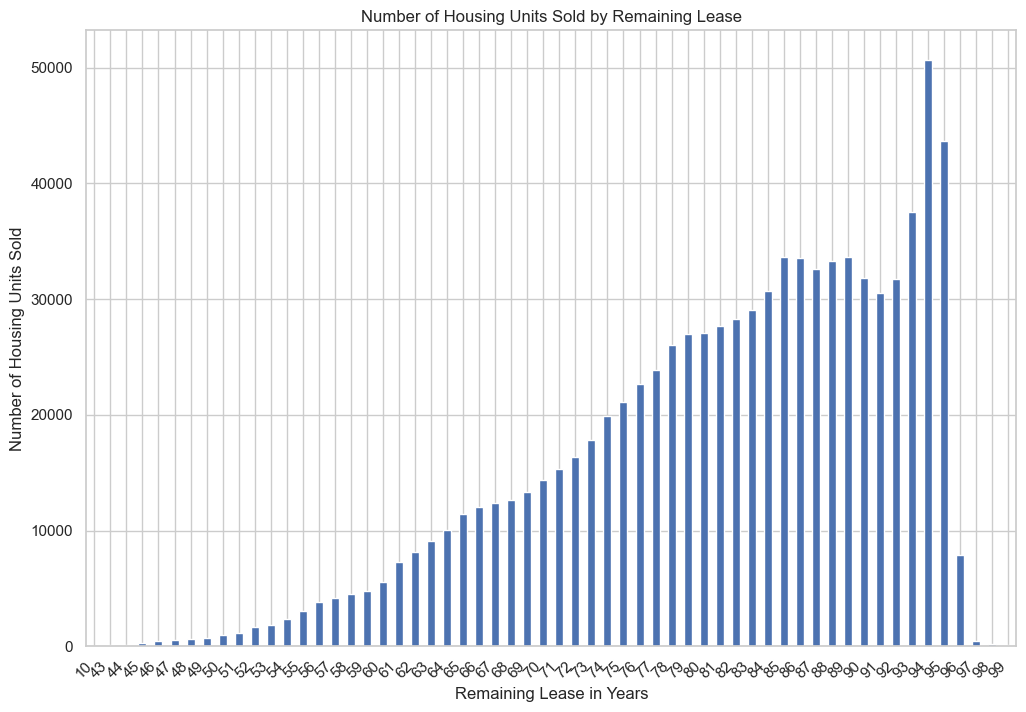

In [12]:
# the remaining_lease column contains text e.g 68 year 08 months
# get the first 2 digits to get the years remaining in lease
data_hdb_raw['first_two_digits'] = data_hdb_raw['remaining_lease'].astype(str).str[:2]

# count the occurrences of each remaining_lease
remaining_years_counts = data_hdb_raw['first_two_digits'].value_counts().sort_index()

# size
plt.figure(figsize=(12, 8))

# plot
remaining_years_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Remaining Lease')
plt.xlabel('Remaining Lease in Years')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

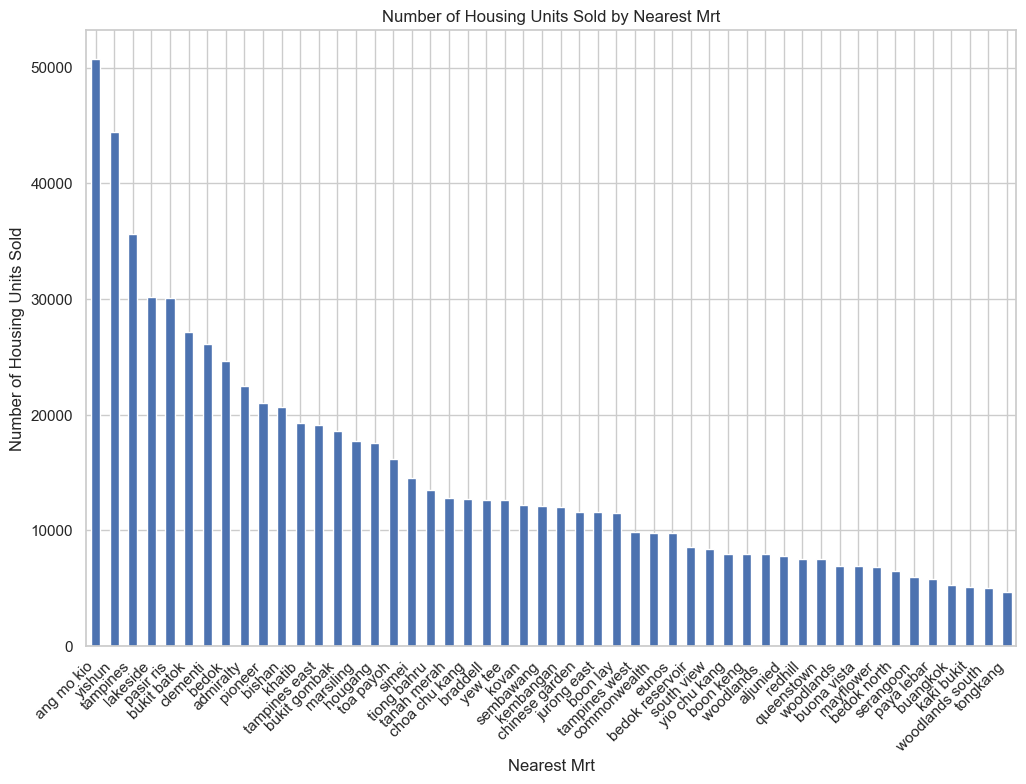

In [13]:
# bar chart for nearest_mrt

# count the occurrences for each mrt, filter top 50 as there are too many
nearest_mrt_counts = data_hdb_raw['nearest_mrt'].value_counts().head(50)

# size
plt.figure(figsize=(12, 8))

# plot
nearest_mrt_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Nearest Mrt')
plt.xlabel('Nearest Mrt')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

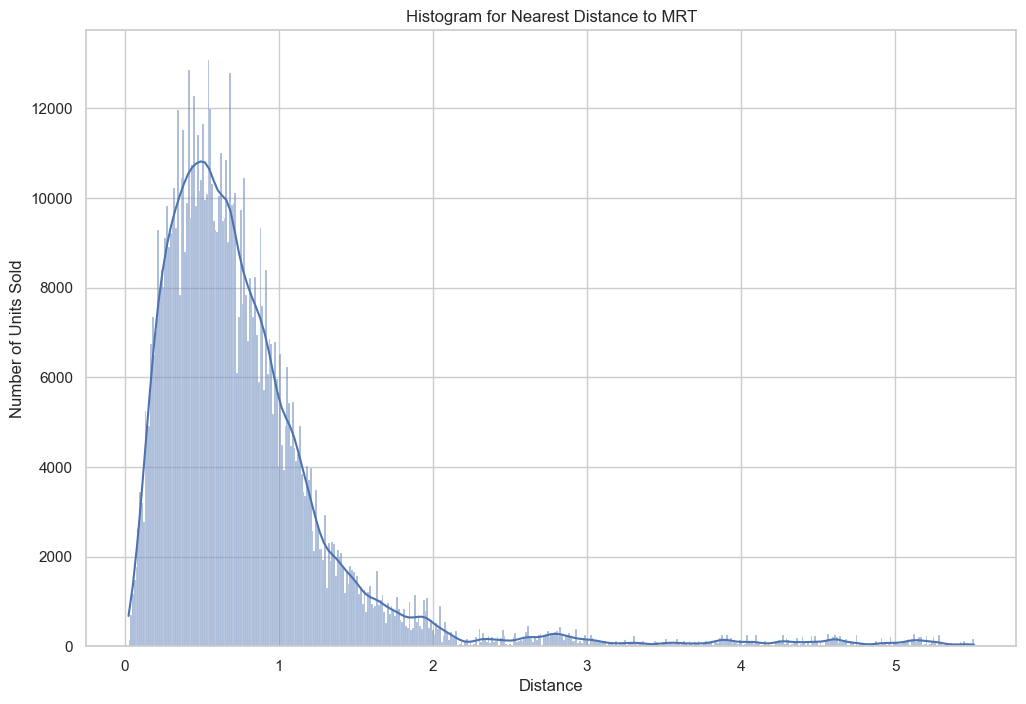

In [14]:
# histogram for nearest_distance_to_mrt

# size
plt.figure(figsize=(12, 8))

#plot
sns.histplot(data_hdb_raw['nearest_distance_to_mrt'], kde=True)
plt.title('Histogram for Nearest Distance to MRT')
plt.xlabel('Distance')
plt.ylabel('Number of Units Sold')
plt.show()

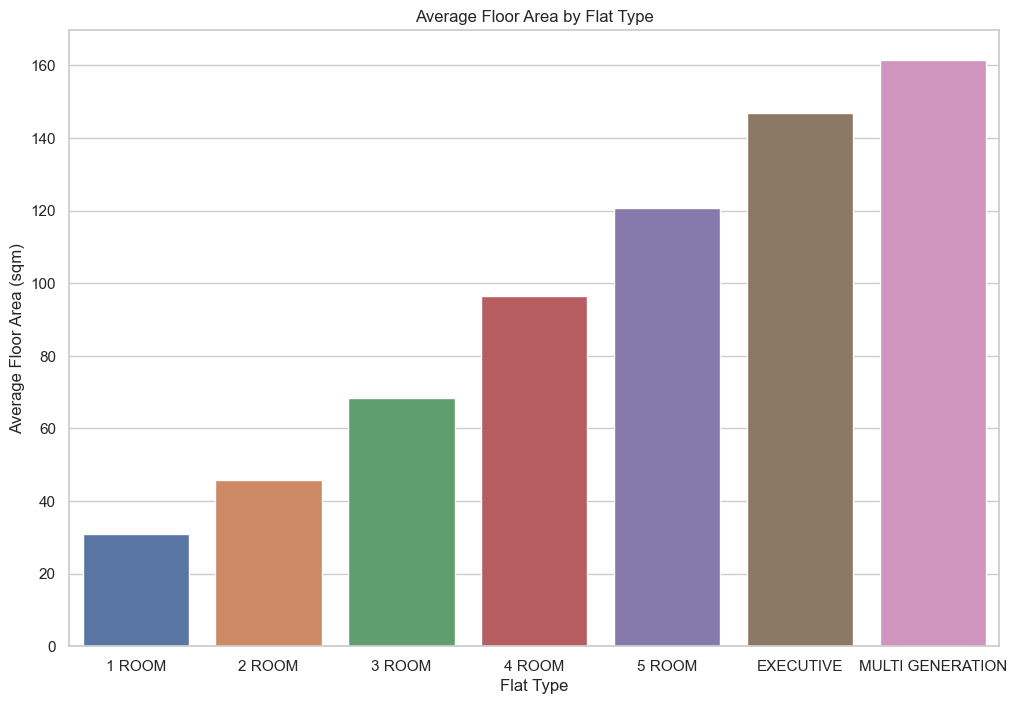

In [15]:
# merge flat types with different names that refer to the same type
data_hdb_raw['flat_type'] = data_hdb_raw['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')

# calculate avg floor area for each flat_type
average_floor_area = data_hdb_raw.groupby('flat_type')['floor_area_sqm'].mean().reset_index()

# size
plt.figure(figsize=(12, 8))

# plot
sns.barplot(x='flat_type', y='floor_area_sqm', data=average_floor_area)
plt.title('Average Floor Area by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Average Floor Area (sqm)')
plt.show()

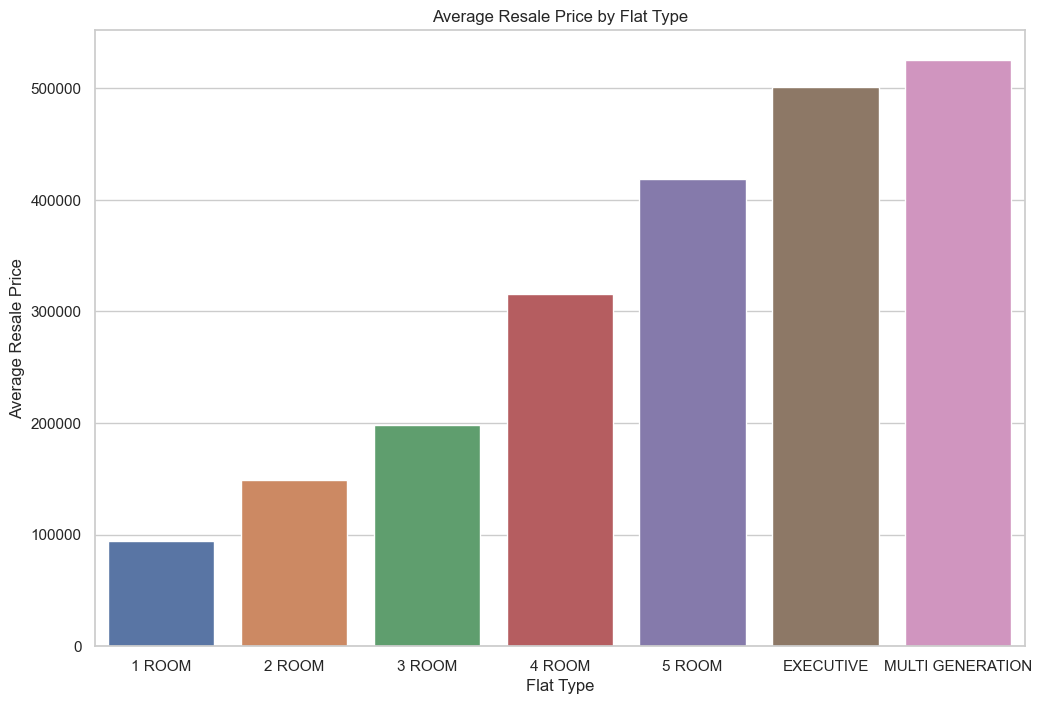

In [16]:
# merge flat types with different names that refer to the same type
data_hdb_raw['flat_type'] = data_hdb_raw['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')

# calculate avg price for each flat_type
average_price = data_hdb_raw.groupby('flat_type')['resale_price'].mean().reset_index()

# size
plt.figure(figsize=(12, 8))

# plot
sns.barplot(x='flat_type', y='resale_price', data=average_price)
plt.title('Average Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Average Resale Price')
plt.show()

### Outlier Analysis

In [17]:
# Box and Whiskers etc
# Kurtosis / Skew?


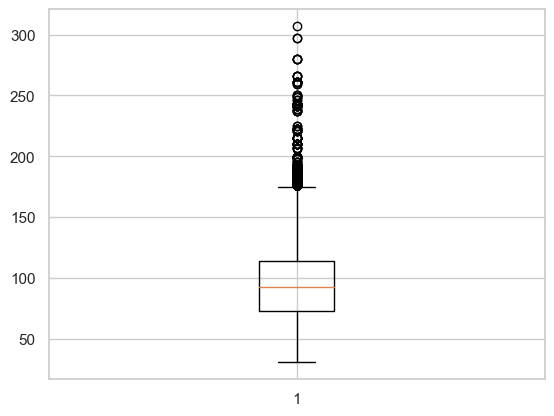

Skewness: 0.37514159698577254
Kurtosis: -0.3693251410280034
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881924 entries, 0 to 881923
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               881924 non-null  int64         
 1   town                     881924 non-null  object        
 2   flat_type                881924 non-null  object        
 3   flat_model               881924 non-null  object        
 4   floor_area_sqm           881924 non-null  float64       
 5   street_name              881924 non-null  object        
 6   resale_price             881924 non-null  float64       
 7   month                    881924 non-null  object        
 8   lease_commence_date      881924 non-null  datetime64[ns]
 9   storey_range             881924 non-null  object        
 10  block                    881924 non-null  object        
 11  remaining_lease   

In [18]:
# floor_area_sqm 

# box plot
plt.boxplot(data_hdb_raw['floor_area_sqm'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_raw['floor_area_sqm'])
kurt = kurtosis(data_hdb_raw['floor_area_sqm'])
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

#----------------------------------------------------------

# remove outlier rows
#Q1 = data_hdb_raw['floor_area_sqm'].quantile(0.25)
#Q3 = data_hdb_raw['floor_area_sqm'].quantile(0.75)
#IQR = Q3 - Q1
#data_hdb_raw = data_hdb_raw[(data_hdb_raw['floor_area_sqm']>Q1-1.5*IQR) & (data_hdb_raw['floor_area_sqm']<Q3+1.5*IQR)]

# --------------------------OR-----------------------------

# replace outlier values with mean
# define threshold (1.5 times IQR) for outliers
outlier_threshold = 1.5

# replace outlier values with mean
#data_hdb_raw['floor_area_sqm'] = data_hdb_raw['floor_area_sqm'].where(
#    (data_hdb_raw['floor_area_sqm']>=Q1-outlier_threshold*IQR) &
#    (data_hdb_raw['floor_area_sqm']<=Q3+outlier_threshold*IQR),
#    data_hdb_raw['floor_area_sqm'].mean()
#)
#-----------------------------------------------------------

data_hdb_raw.info()


### Correlation Analysis

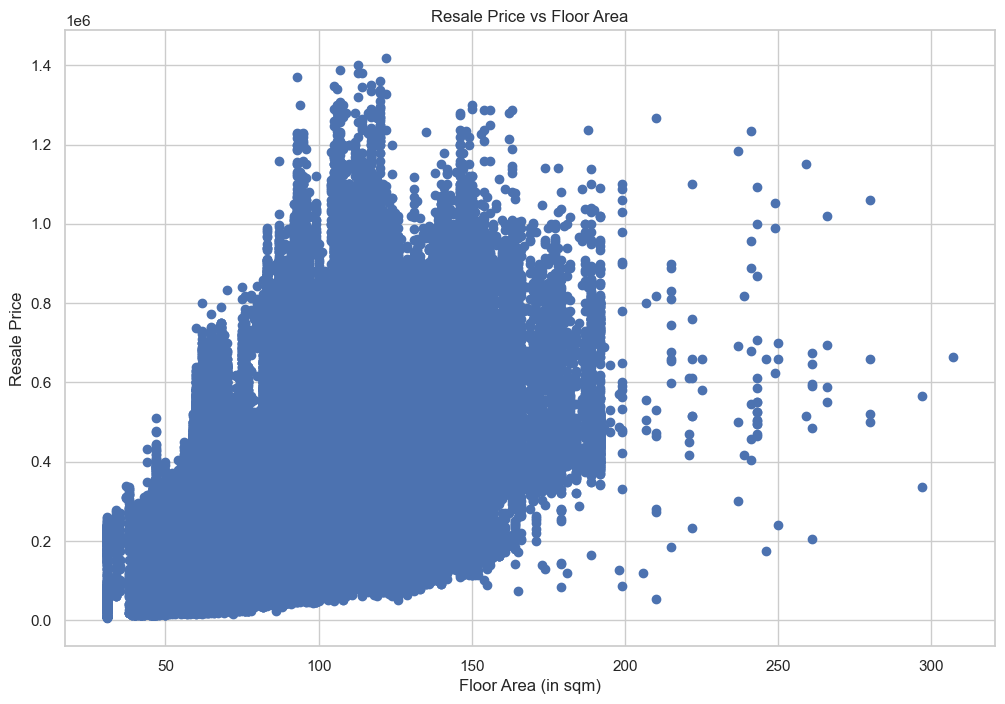

In [20]:
# Finding Correlation between Numerical Features

# resale price vs floor area 
# correlation coefficient
print(data_hdb_raw[['resale_price','floor_area_sqm']].corr())

# scatterplot
plt.figure(figsize=(12,8))
plt.scatter(data_hdb_raw['floor_area_sqm'], data_hdb_raw['resale_price'])
plt.xlabel('Floor Area (in sqm)')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Floor Area')
plt.show()

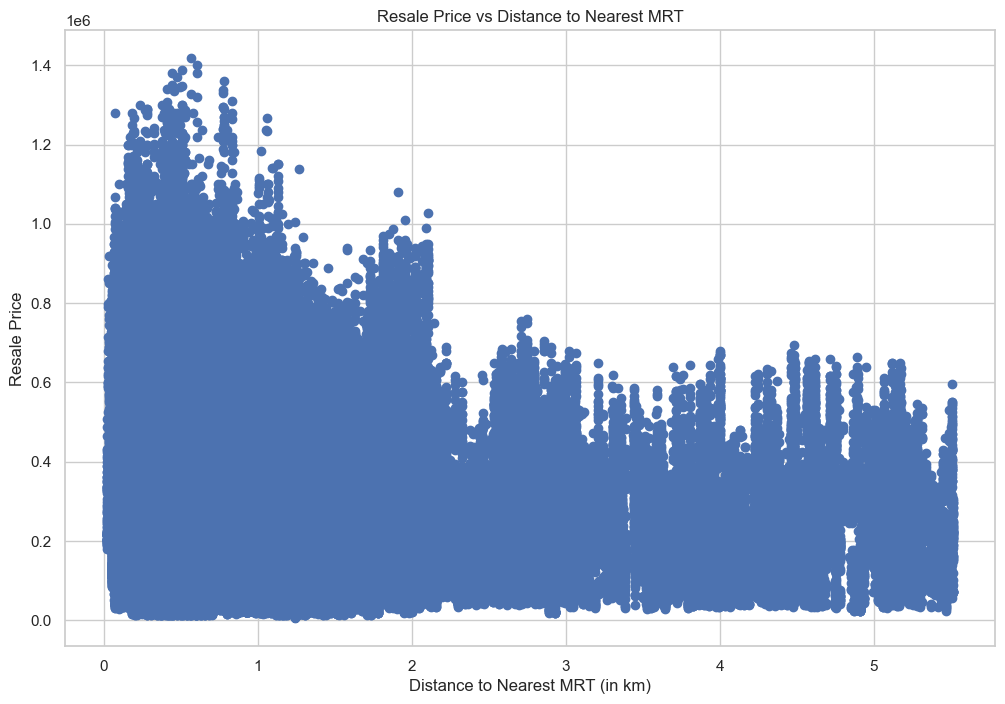

In [21]:
# resale price vs nearest distance to mrt
# correlation coefficient
print(data_hdb_raw[['resale_price','nearest_distance_to_mrt']].corr())

# scatter plot
plt.figure(figsize=(12,8))
plt.scatter(data_hdb_raw['nearest_distance_to_mrt'], data_hdb_raw['resale_price'])
plt.xlabel('Distance to Nearest MRT (in km)')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Distance to Nearest MRT')
plt.show()

In [22]:
# resale price vs remaining lease
# conversion of data type for remaining lease
def convert_year_to_float(value):
    if isinstance(value, int):
        value = str(value)
    match = re.match(r'(\d+)(?: years (\d+) months)?', value)
    years = int(match.group(1))
    months = int(match.group(2)) if match.group(2) else 0
    return years + months / 12

data_hdb_raw['remaining_lease'] = data_hdb_raw['remaining_lease'].apply(convert_year_to_float)

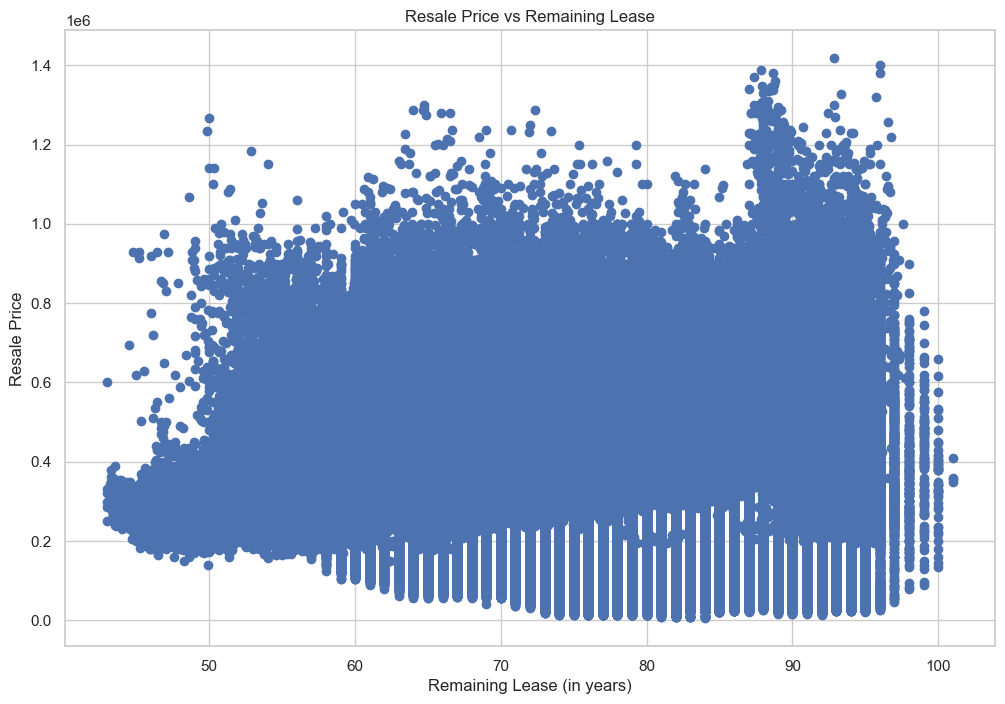

In [23]:
# correlation coefficient
print(data_hdb_raw[['resale_price','remaining_lease']].corr())

# scatter plot
plt.figure(figsize=(12,8))
plt.scatter(data_hdb_raw['remaining_lease'], data_hdb_raw['resale_price'])
plt.xlabel('Remaining Lease (in years)')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Remaining Lease')
plt.show()

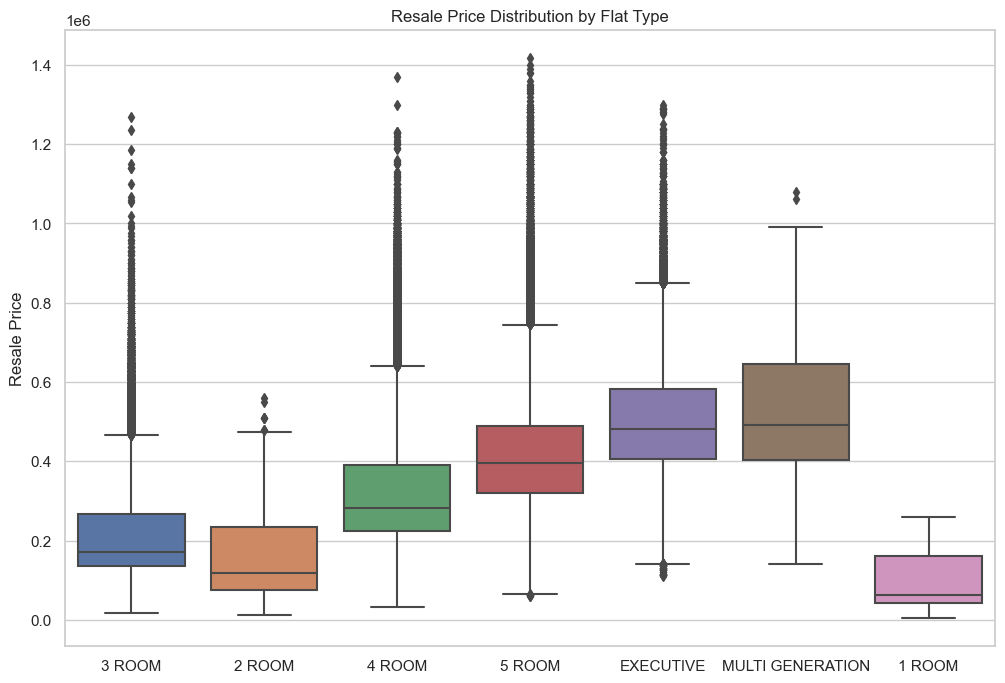

In [24]:
# Relationship between Categorical Features

# flat type vs resale price
plt.figure(figsize=(12, 8))
sns.boxplot(x='flat_type', y='resale_price', data=data_hdb_raw)
plt.xlabel('')
plt.ylabel('Resale Price')
plt.title('Resale Price Distribution by Flat Type')
plt.show()

In [30]:
# Finding out the different types of flat models for each flat type
grouped = data_hdb_raw.groupby('flat_type')['flat_model'].unique()
results = []

for flat_type, flat_models in grouped.items():
    results.append([flat_type, ', '.join(map(str, flat_models))])

print(tabulate(results, headers=["Flat Type", "Flat Models"], tablefmt="pretty"))

+------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|    Flat Type     |                                                                     Flat Models                                                                     |
+------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|      1 ROOM      |                                                                      Improved                                                                       |
|      2 ROOM      |                                            Improved, Standard, 2-room, Model A, Premium Apartment, DBSS                                             |
|      3 ROOM      |                              Improved, New Generation, Model A, Simplified, Standard, Terrace, Premium Apartment, DBSS      

In [25]:
# Combining 'flat_type' and 'flat_model' to give a better representation of the flat's category
data_hdb_raw['flat_category'] = data_hdb_raw['flat_type'] + " " + data_hdb_raw['flat_model']

flat_category
4 ROOM Model A                       182327
5 ROOM Improved                      136090
3 ROOM New Generation                117791
3 ROOM Improved                       75355
4 ROOM New Generation                 63848
3 ROOM Model A                        50996
4 ROOM Simplified                     42550
EXECUTIVE Apartment                   34454
EXECUTIVE Maisonette                  28842
4 ROOM Premium Apartment              21384
3 ROOM Standard                       19585
5 ROOM Premium Apartment              16992
5 ROOM Model A                        16212
4 ROOM Improved                       13969
3 ROOM Simplified                     13749
5 ROOM Standard                       13697
4 ROOM Model A2                        9748
2 ROOM Standard                        5880
EXECUTIVE Premium Apartment            3833
2 ROOM Improved                        2657
5 ROOM Model A-Maisonette              2022
5 ROOM DBSS                            1427
2 ROOM Model A    

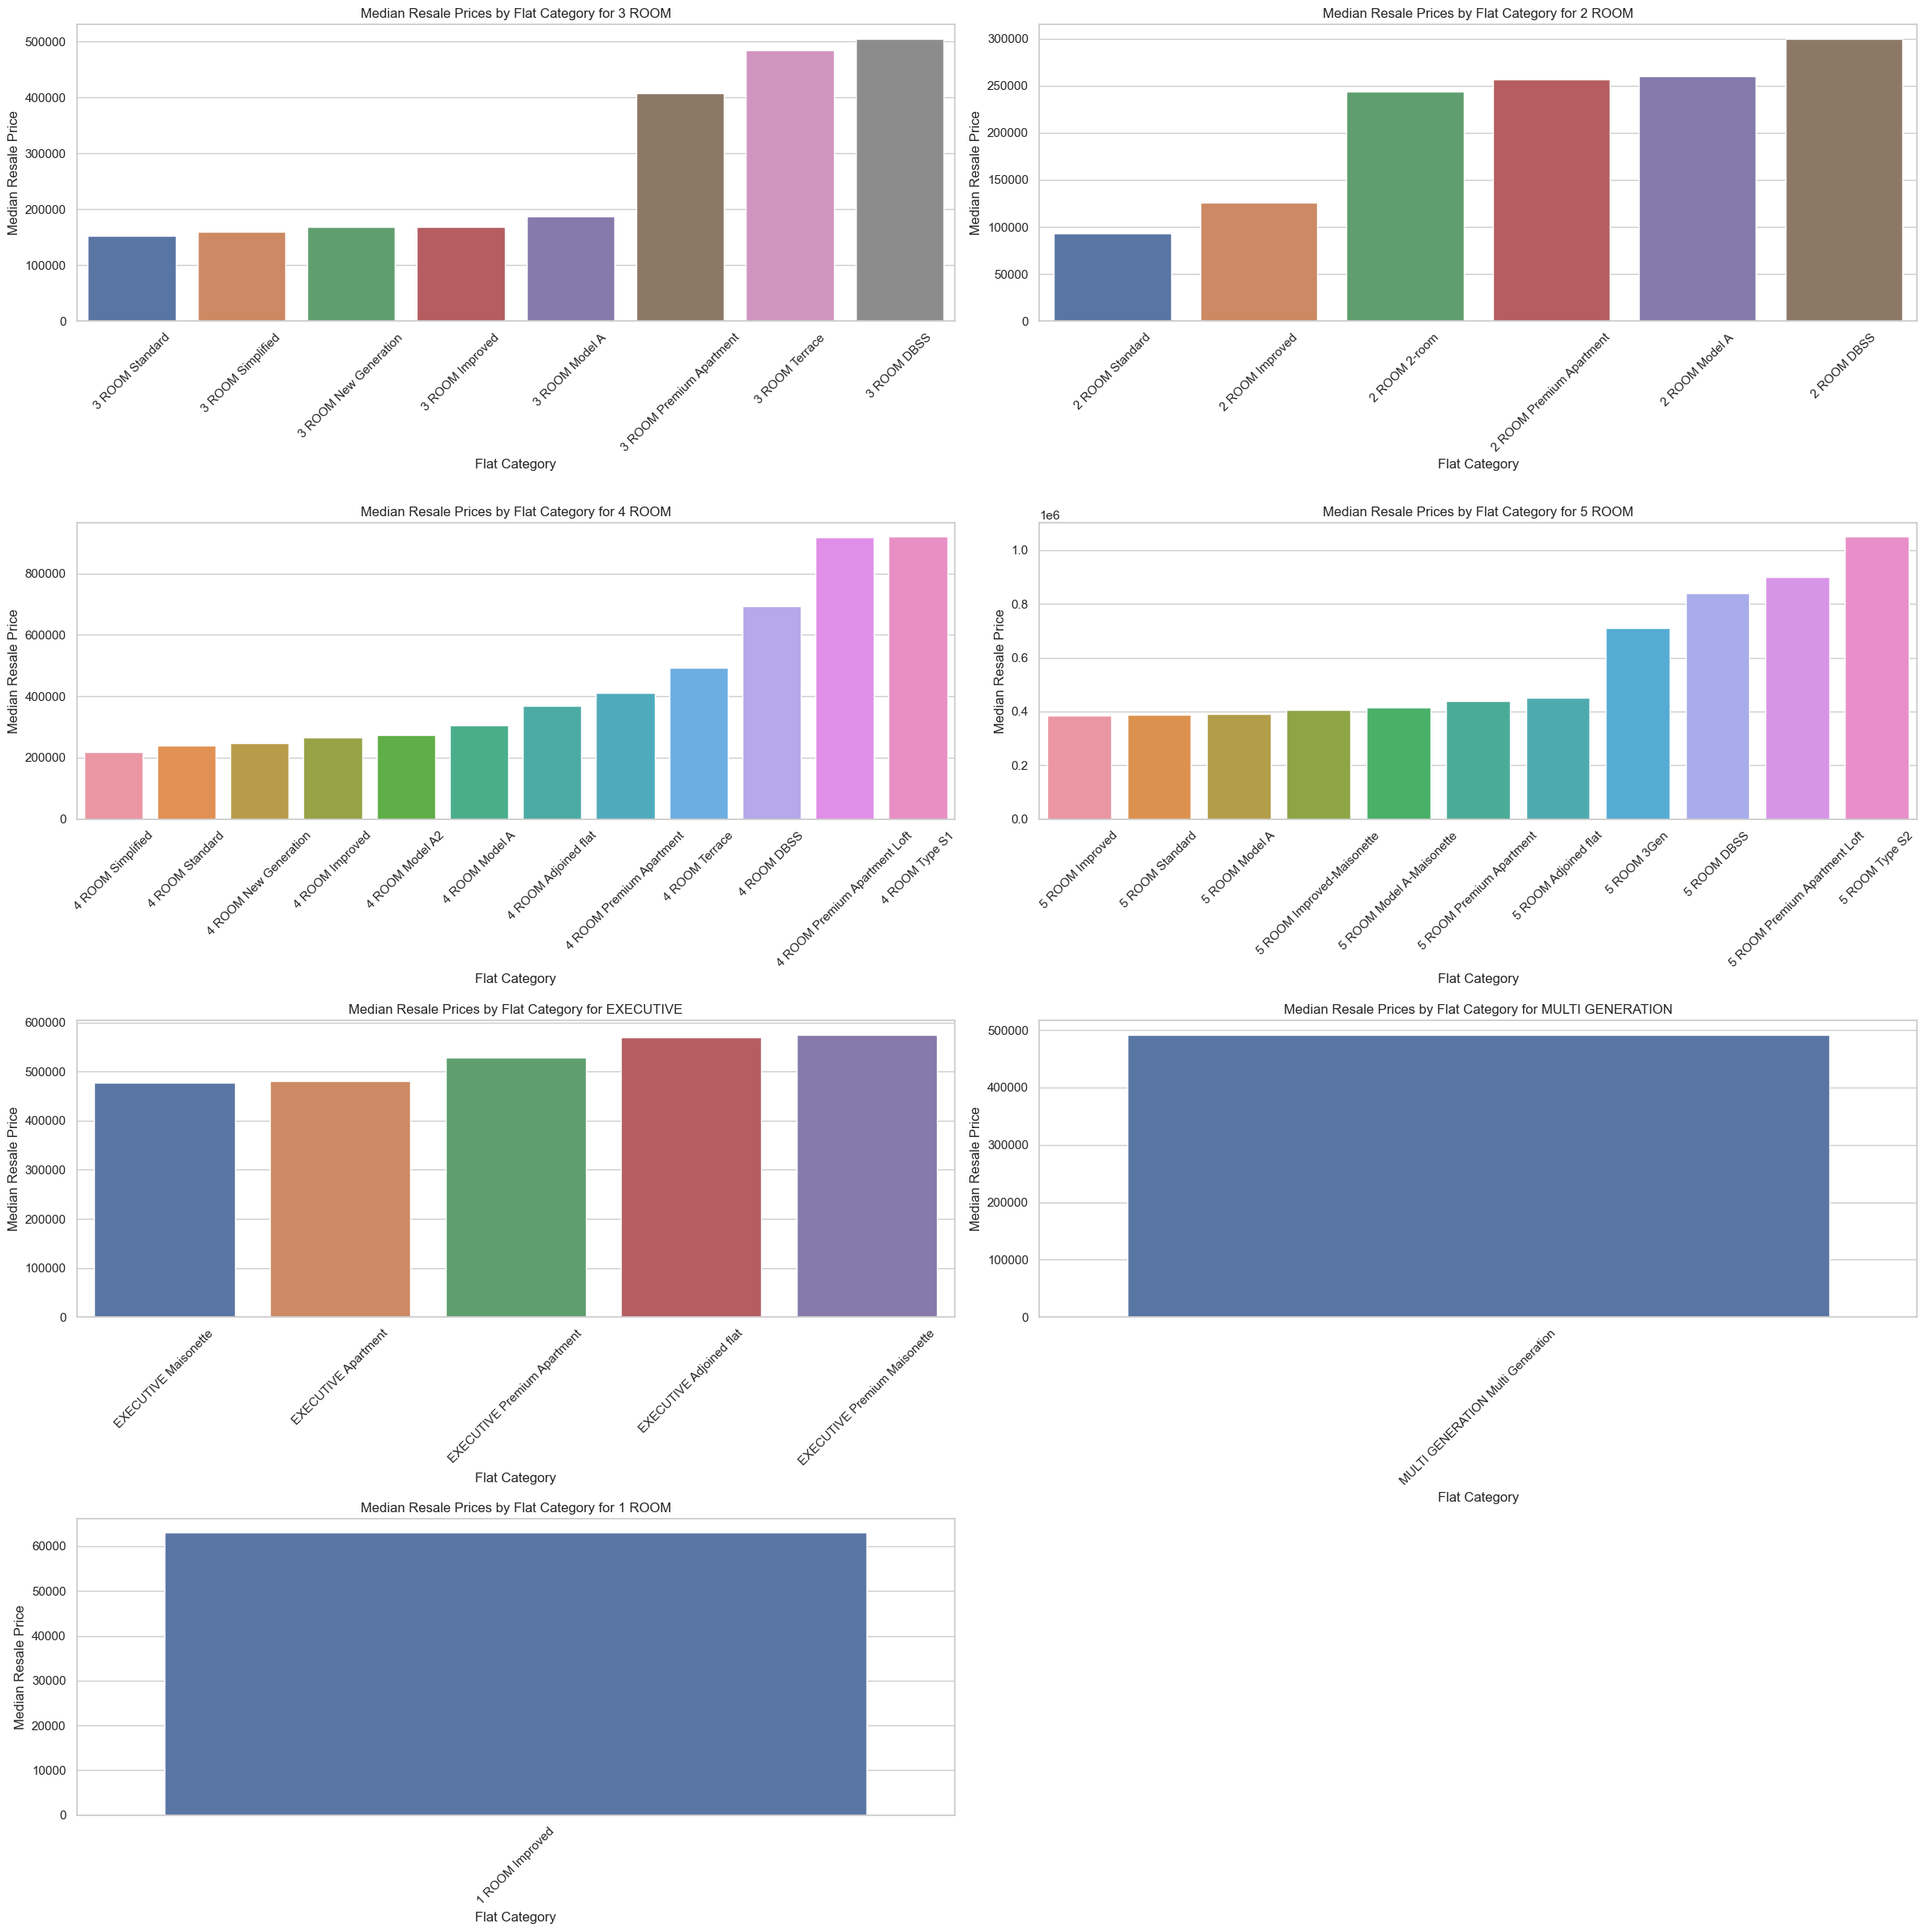

In [54]:
# Finding the median resale prices across flat models for each flat type
unique_flat_types = data_hdb_raw['flat_type'].unique()

num_plots = 7
num_cols = 2
num_rows = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12*num_cols, 6*num_rows))

for i, flat_type in enumerate(unique_flat_types):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_plots > 1 else axes
    filtered_data = data_hdb_raw[data_hdb_raw['flat_type'] == flat_type]
    median_resale_prices = filtered_data.groupby('flat_category')['resale_price'].median().reset_index().sort_values(by='resale_price')
    sns.barplot(x='flat_category', y='resale_price', data=median_resale_prices, ax=ax) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'Median Resale Prices by Flat Category for {flat_type}')
    ax.set_xlabel('Flat Category') 
    ax.set_ylabel('Median Resale Price')

for ax in axes.flatten()[len(unique_flat_types):]:
    ax.axis('off')
    
plt.tight_layout()
plt.show()


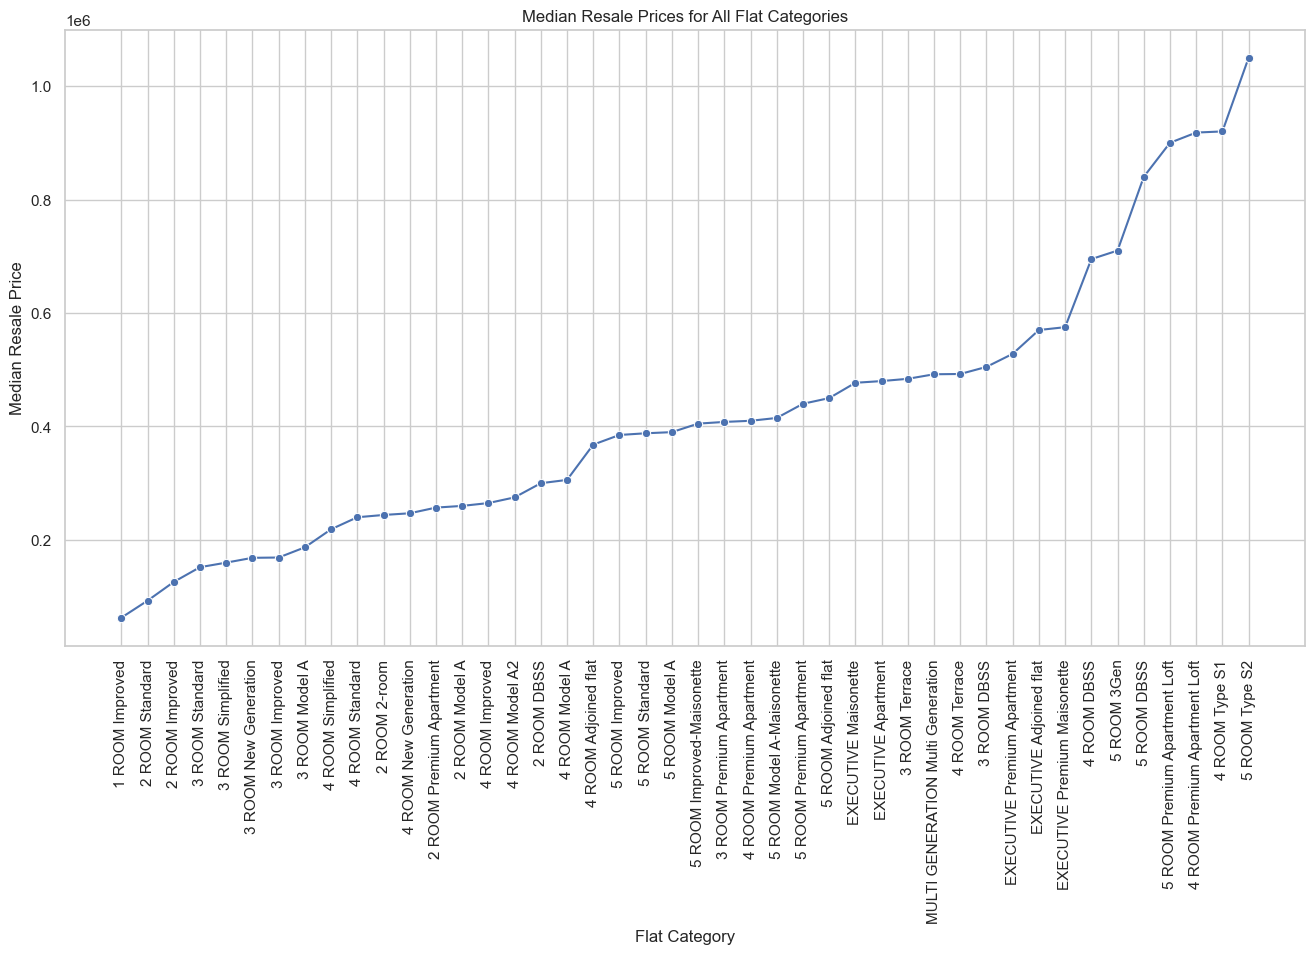

In [38]:
# Finding the median resale prices across all flat categories
median_resale_prices_all = data_hdb_raw.groupby(['flat_category'])['resale_price'].median().reset_index()
median_resale_prices_all = median_resale_prices_all.sort_values(by='resale_price')

# plot the aggregated data
plt.figure(figsize=(16, 8))
sns.lineplot(x='flat_category', y='resale_price', data=median_resale_prices_all, marker='o')  
plt.xticks(rotation=90) 
plt.title('Median Resale Prices for All Flat Categories')  
plt.xlabel('Flat Category')  
plt.ylabel('Median Resale Price')  
plt.show()

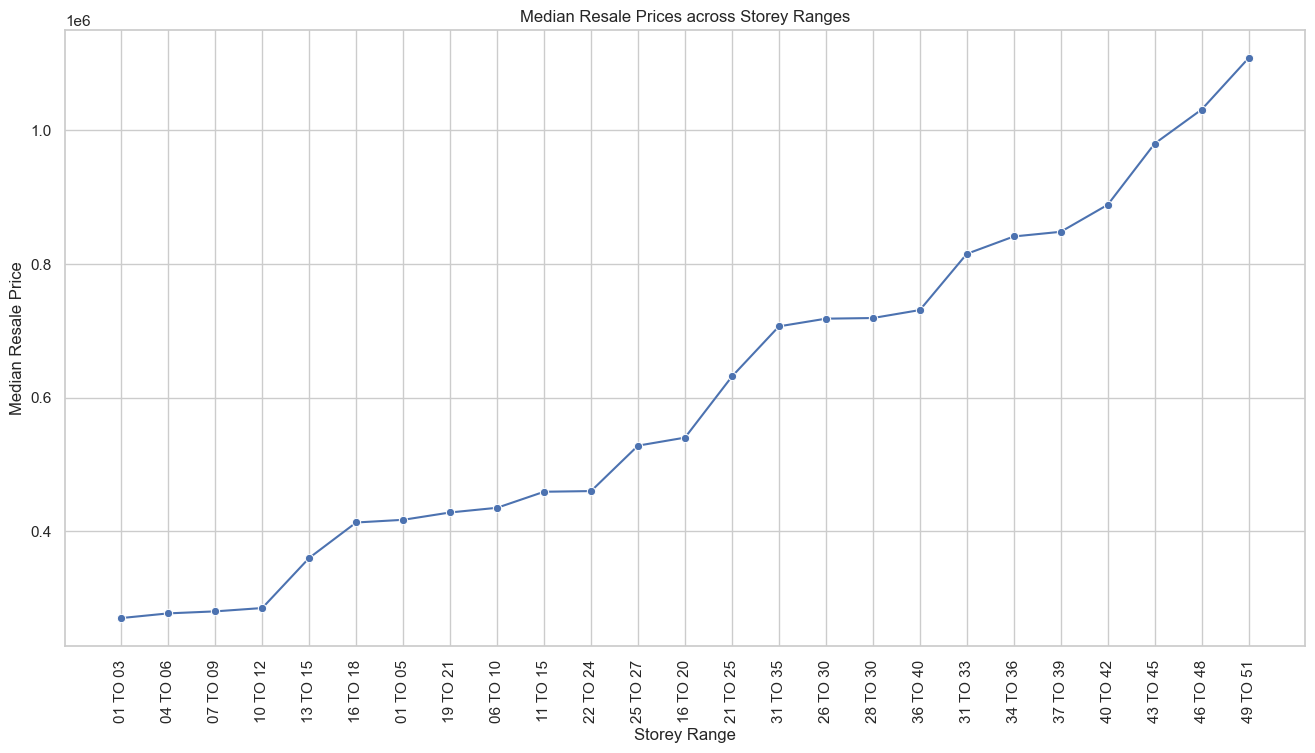

In [60]:
# resale price vs storey range
median_resale_prices_storey = data_hdb_raw.groupby(['storey_range'])['resale_price'].median().reset_index()
median_resale_prices_storey = median_resale_prices_storey.sort_values(by='resale_price')

# plot the aggregated data
plt.figure(figsize=(16, 8))
sns.lineplot(x='storey_range', y='resale_price', data=median_resale_prices_storey, marker='o')  
plt.xticks(rotation=90) 
plt.title('Median Resale Prices across Storey Ranges')  
plt.xlabel('Storey Range')  
plt.ylabel('Median Resale Price')  
plt.show()


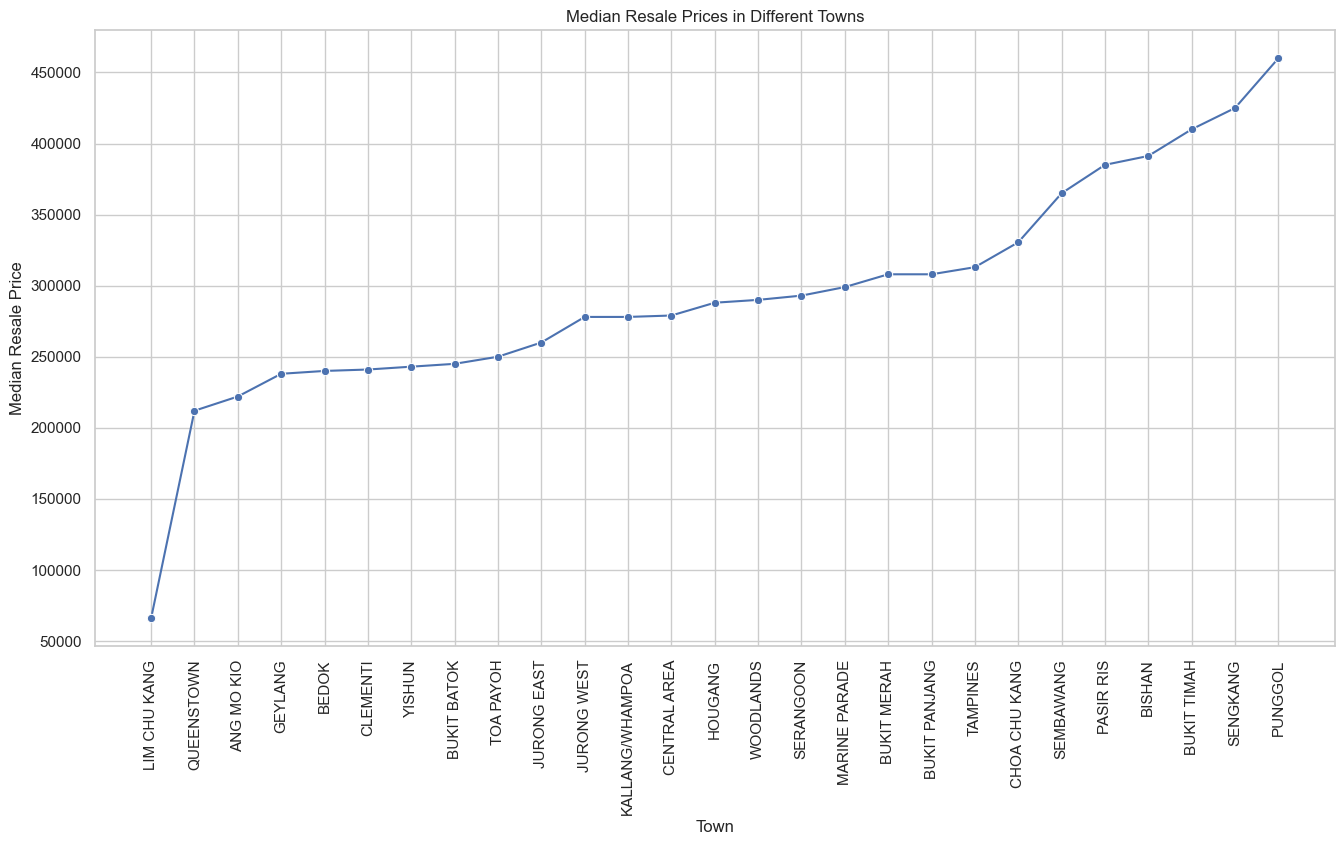

In [58]:
# resale price vs town
median_resale_prices_town = data_hdb_raw.groupby(['town'])['resale_price'].median().reset_index()
median_resale_prices_town = median_resale_prices_town.sort_values(by='resale_price')

# plot the aggregated data
plt.figure(figsize=(16, 8))
sns.lineplot(x='town', y='resale_price', data=median_resale_prices_town, marker='o')  
plt.xticks(rotation=90) 
plt.title('Median Resale Prices in Different Towns')  
plt.xlabel('Town')  
plt.ylabel('Median Resale Price')  
plt.show()